# CIFAR-10


URL for CIFAR-10: https://www.cs.toronto.edu/~kriz/cifar.html

The CIFAR-10 dataset consists of 60000 **32x32** colour images in **10 classes**, with 6000 images per class. There are 50000 training images and 10000 test images. 


The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but **some training batches ** may** contain more images** from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [2]:
# change the path according to your drive
import tarfile
path = "drive/My Drive"

tar = tarfile.open(path + "/cifar-10-python.tar.gz")
tar.extractall()
tar.close()

FileNotFoundError: [Errno 2] No such file or directory: 'drive/My Drive/cifar-10-python.tar.gz'

In [6]:
import pickle

def load_file(filename):
    with open(filename, 'rb') as fo:
        data = pickle.load(fo, encoding='latin1')
    return data

**data** -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

**labels** -- a list of 10000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

images = []
labels = []

for i in range(1,6):
  data = load_file('cifar-10-batches-py/data_batch_'+str(i))
  for j in range(0,10000):
    r = np.array(data["data"][j][0:1024]).reshape(32,32)
    g = np.array(data["data"][j][1024:2048]).reshape(32,32)
    b = np.array(data["data"][j][2048:3072]).reshape(32,32)
    img = np.dstack((r,g,b))
    images.append(img)

    labels.append(data["labels"][j])

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
dic = {0:"airplane",
     1:"automobile",
     2:"bird",
     3:"cat",
     4:"deer",
     5:"dog",
     6:"frog",
     7:"horse",
     8:"ship",
     9:"truck"}

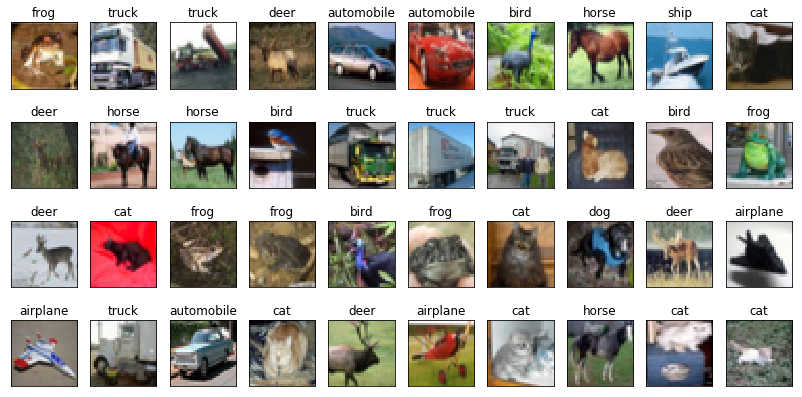

In [ ]:
# Show examples
def show_examples(images):
    fig = plt.figure(figsize=(14, 7))

    count = 1
    for img in images:
        if(count > 40):
            break
        ax = fig.add_subplot(4, 10,count, xticks=[], yticks=[])
        plt.imshow(img,interpolation="nearest")
        ax.set_title(dic[labels[count-1]])
        count+=1

show_examples(images)